In [1]:
import sys
import yfinance as yf
import pandas as pd

%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
#import pickle

In [2]:
stock_ticker='OIH'
stock_obj=yf.Ticker(stock_ticker)
history=stock_obj.history(period="max")

objexpirs=stock_obj.options
objexpirs=sorted(objexpirs)


In [3]:
data=pd.DataFrame(history)
last_price=data.High[-1]

In [4]:
# Create triplet
v_expirs=[]
v_expirind=[]
v_strikes=[]
v_oi=[]

nexpirs=len(objexpirs)
for ne in range(nexpirs):
    try:
        k=stock_obj.option_chain(objexpirs[ne])
        calls=k.calls
        oi=calls.openInterest
        strikes=calls.strike
        nstrikes=len(strikes)
        for ns in range(nstrikes):
            #print([expirs[ne],strikes[ns],oi[ns]])
            v_expirind.append(ne)
            v_expirs.append(objexpirs[ne])
            v_strikes.append(strikes[ns])
            v_oi.append(oi[ns])
    except:
        print('skipped ',objexpirs[ne])




In [5]:

dtexpirs=[]
for exp in objexpirs:
    dtexpirs.append(dt.strptime(exp,'%Y-%m-%d'))


t0=dt.strptime(objexpirs[0],'%Y-%m-%d')
tf=dt.strptime(objexpirs[-1],'%Y-%m-%d')
weeks=[t0]
tn=t0
while tn < tf:
    tn = tn + timedelta(days=7)
    weeks.append(tn)

for exp in dtexpirs:
    weeks.append(exp)

weeks=sorted(weeks)
weeks=np.unique(weeks)
weeks=weeks.tolist()


expirinds=[]
for i in range(len(dtexpirs)):
    expirinds.append(weeks.index(dtexpirs[i]))

#print(weeks[expirinds[2]])

#print(v_expirind)
v_expirinds = []
for i in range(len(v_expirind)):
    #print(v_expirind[i])
    v_expirinds.append(expirinds[v_expirind[i]])

#print(v_expirinds)

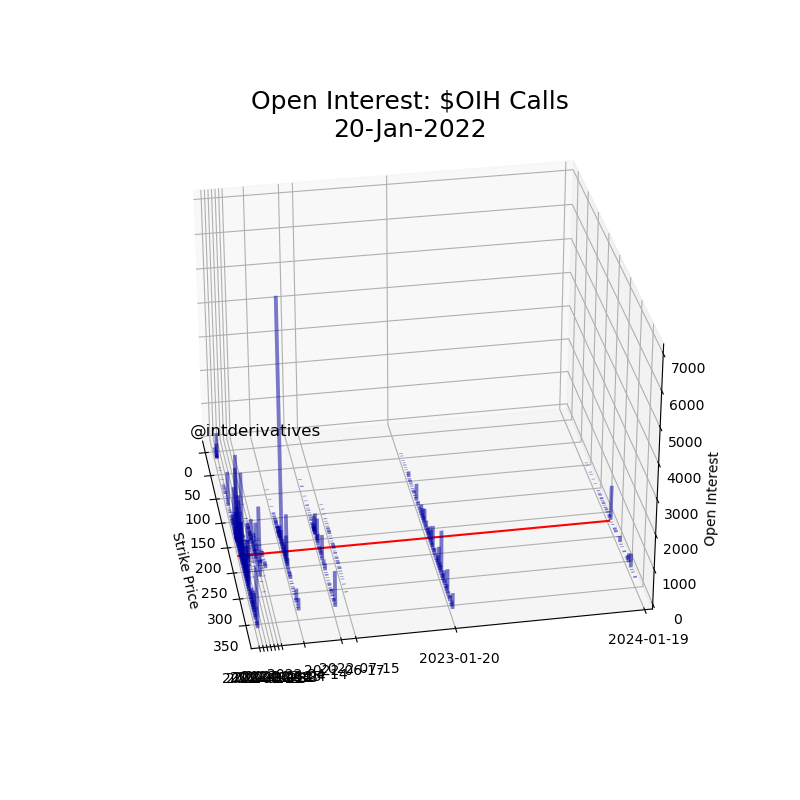

In [8]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

npos=len(v_expirind)

xx=v_expirinds
yy=v_strikes
openint=v_oi

dx = np.ones(len(xx))
dy = np.ones(len(yy))
bottom = np.zeros(len(xx))

ax.bar3d(yy, xx, bottom, dx, dy, openint, shade=True, alpha=0.3,color='blue')
ax.plot([last_price, last_price],[expirinds[0], expirinds[-1]],[0, 0],color='red')
#ax.set_box_aspect((10,20,10))

## X and Y labels and ticks
ax.set_xlabel('Strike Price')
ax.set_zlabel('Open Interest')
ax.set_yticks(expirinds)
ax.set_yticklabels(objexpirs)
ax.set_ylim([expirinds[0],expirinds[-1]])

## Title
plt.rcParams['axes.titley']=1.0
today=date.today()
datetitle=today.strftime('%d-%b-%Y')
ax.set_title('Open Interest: $'+stock_ticker+' Calls\n'+datetitle,fontsize=18)

## Signature
ax.text(-100,-4,-1000,'@intderivatives',fontsize=12)

## Viewing Angle(0, 360):
ax.view_init(30, 350)

## Saving file
datefilename=today.strftime('%d-%m-%Y')
fig.savefig('/Users/peter/projects/intderiv/media/bar3d-openinterest-'+stock_ticker+'-'+datefilename,dpi=400)

#pickle.dump(fig, open('FigureObject.fig.pickle','wb'))